# Estimating model parameters with Gaussian Mixture Model (GMM) and EM

We will generate data from 2 Gaussian distributions and subsequently estimate the parameters of the distribution.


The Data generation source will actually denote 2 distributions.
 We will train a GMM model and make prediction to identify if it is able to identify the two generation sources.
 

In [2]:
import numpy as np
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot

## Generate Data

In [14]:
X1 = np.random.normal(loc=20, scale=5, size=3000)
X2 = np.random.normal(loc=40, scale=5, size=7000)

X = np.hstack((X1, X2))
X.shape

(10000,)

In [5]:
# REshape into a table with one column
X = X.reshape(len(X), 1)
X.shape

(10000, 1)

## Plot the Histogram

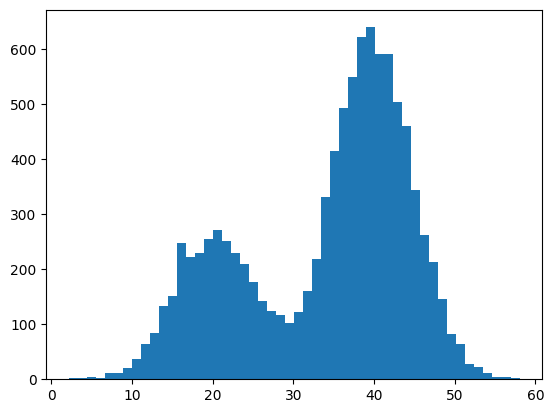

In [6]:
pyplot.hist(X, bins=50)
pyplot.show()

## Train a GMM Model

In [18]:
model = GaussianMixture(n_components=2, init_params='random')
model.fit(X)

GaussianMixture(init_params='random', n_components=2)

## Make Prediction

In [9]:
yhat = model.predict(X)

In [11]:
yhat.size

10000

In [12]:
print(yhat[:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [13]:
print(yhat[-100:])

[0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1
 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1]


## Part-2: Train a GMM with different number of components

In [15]:
from sklearn.datasets import make_blobs

## Generate synthetic data

In [16]:
X, y = make_blobs(n_samples=500, centers=5, random_state=42)

In [17]:
X.shape

(500, 2)

## Train GMMs with different number of components

In [19]:
n_components = range(1, 11)
models = [GaussianMixture(n_components=n, random_state=42).fit(X) for n in n_components]


In [20]:
len(models)

10

## Evalute the performance of the model with AIC/BIC Scores


The lower the AIC or BIC score, the better the model fit.

In [21]:
# Calculate the AIC and BIC scores for each model

aic_scores = [ model.aic(X) for model in models]
bic_scores = [ model.bic(X) for model in models]



In [24]:
aic_scores

[6248.871500049277,
 5237.295749135486,
 4665.706349508695,
 4428.363419064131,
 4388.74837706198,
 4394.528501278019,
 4401.416655506975,
 4409.733729757886,
 4415.020225637169,
 4416.557430654112]

In [22]:
import matplotlib.pyplot as plt


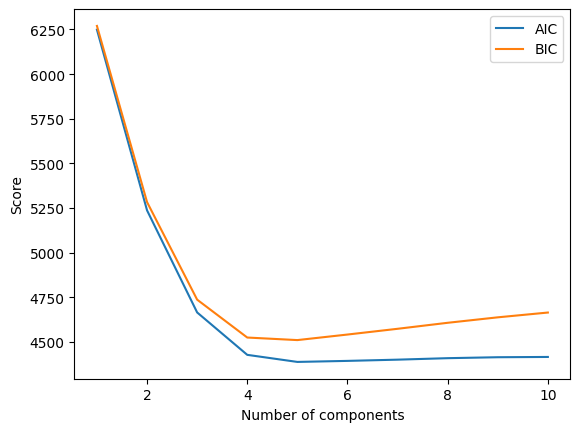

In [23]:
plt.plot(n_components, aic_scores, label="AIC")
plt.plot(n_components, bic_scores, label="BIC")
plt.legend()
plt.xlabel('Number of components')
plt.ylabel('Score')
plt.show()

## Fit the best GMM model

In [25]:
best_model_idx = np.argmin(aic_scores)
best_model_idx

4

In [26]:
best_model_idx = np.argmin(bic_scores)
best_model_idx

4

## Select the best model

In [29]:
best_model = models[best_model_idx]
best_model

GaussianMixture(n_components=5, random_state=42)

In [30]:
print('Best model with %d components' % n_components[best_model_idx])

Best model with 5 components


In [31]:
print(best_model)

GaussianMixture(n_components=5, random_state=42)


## Make Prediction

In [32]:
labels = best_model.predict(X)
labels

array([2, 4, 4, 4, 1, 2, 1, 4, 0, 0, 2, 2, 2, 4, 3, 3, 2, 3, 1, 2, 4, 3,
       1, 3, 0, 3, 0, 3, 1, 2, 0, 0, 0, 4, 4, 0, 3, 2, 3, 0, 3, 4, 0, 3,
       0, 1, 0, 3, 1, 1, 1, 0, 4, 2, 4, 4, 4, 3, 3, 1, 1, 0, 4, 1, 0, 4,
       4, 1, 4, 4, 2, 2, 4, 2, 4, 2, 2, 0, 3, 1, 1, 0, 2, 3, 1, 3, 2, 2,
       0, 2, 4, 1, 2, 1, 0, 2, 0, 1, 2, 4, 4, 4, 0, 2, 0, 1, 1, 1, 1, 1,
       2, 0, 2, 4, 1, 4, 3, 3, 1, 4, 3, 4, 4, 4, 4, 1, 0, 2, 1, 4, 2, 3,
       4, 3, 2, 3, 1, 2, 4, 4, 1, 1, 3, 1, 1, 3, 4, 1, 3, 4, 3, 2, 0, 0,
       0, 3, 4, 4, 1, 0, 4, 0, 1, 3, 3, 1, 3, 2, 4, 3, 2, 2, 3, 4, 1, 4,
       0, 0, 1, 4, 0, 0, 1, 2, 3, 0, 1, 0, 0, 4, 2, 2, 4, 0, 3, 3, 3, 2,
       3, 2, 4, 0, 0, 3, 4, 0, 0, 3, 4, 4, 1, 4, 3, 2, 2, 4, 3, 3, 1, 0,
       0, 3, 0, 4, 0, 2, 2, 0, 3, 2, 2, 0, 0, 4, 1, 2, 3, 1, 0, 1, 3, 3,
       0, 1, 2, 4, 1, 3, 0, 2, 4, 1, 2, 0, 1, 0, 4, 2, 0, 4, 2, 2, 0, 4,
       0, 3, 1, 2, 0, 2, 3, 0, 0, 2, 4, 0, 0, 0, 2, 4, 3, 0, 1, 2, 0, 3,
       2, 1, 4, 4, 1, 3, 0, 0, 2, 3, 2, 3, 1, 3, 2,

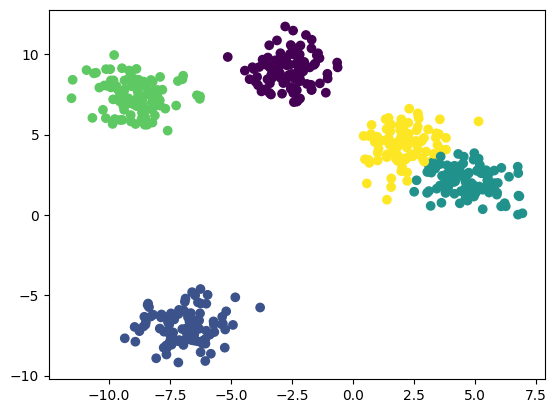

In [33]:
# Scatter plot of data

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()